In [ ]:
# Import Modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

from sklearn.datasets import load_breast_cancer
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import svm
import warnings



**1. Making DataFrame out of SKLEARN.dataset**

In [ ]:
cancer = load_breast_cancer()     
pd.set_option('display.max_columns', None)
data = np.c_[cancer.data, cancer.target]
columns = np.append(cancer.feature_names, ["target"])
cancer1 = pd.DataFrame(data, columns=columns)
cancer1

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


**2. Data Analysis using Pandas and matplotlib**

In [ ]:
# Print shape of data
print("Records: ", cancer1.shape[0])
print("Columns: ", cancer1.shape[1])

Records:  569
Columns:  31


Breast Radius mean: 13.637961335676625
Breast Radius max: 28


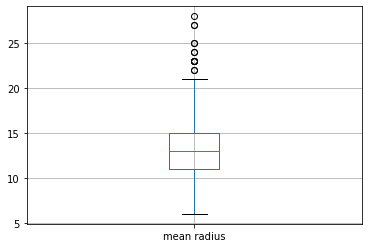

In [ ]:
# Determining the mean of Breast Radius
cancer1.boxplot(column='mean radius')
# Displaying a boxplot to show distribution of Breast Radius
cancer1['mean radius'] = cancer1['mean radius'].astype(int)
print('Breast Radius mean:', cancer1['mean radius'].mean())
print('Breast Radius max:', cancer1['mean radius'].max())

              mean radius  worst radius  radius error
mean radius      1.000000      0.969539      0.679090
worst radius     0.969539      1.000000      0.715065
radius error     0.679090      0.715065      1.000000
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd8b1f9b50>


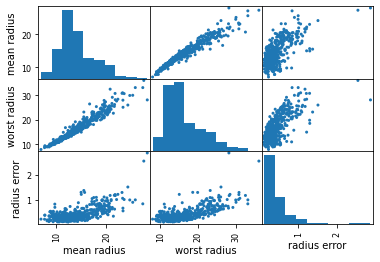

In [ ]:
# Making a list of the columns to use for getting correlation
cor = list(['mean radius','worst radius','radius error'])
# Outputting correlation score between the columns
correlation = cancer1[cor].corr()
print(correlation)
# Creating and outputting a scaterplot matrix of the columns and their correlation
print(scatter_matrix(cancer1[cor], alpha = 1))

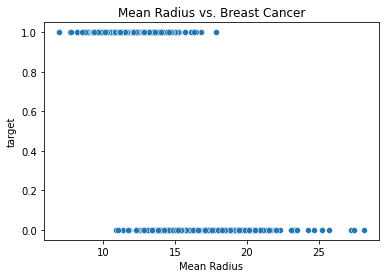

In [ ]:
import seaborn as sns
# Creating scatterplot of mean radius vs target (yes, no)
ax = sns.scatterplot(x="mean radius", y="target", data=cancer1)
ax.set_title("Mean Radius vs. Breast Cancer")
ax.set_xlabel("Mean Radius");

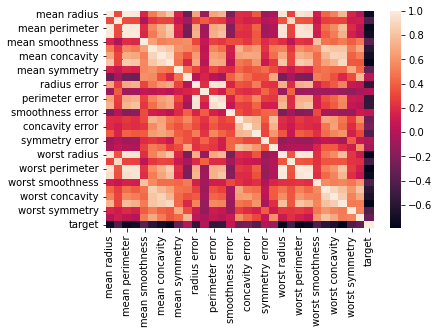

In [ ]:
# Create heatmap to spot any linear relationships between features and the target.
correlationmap = cancer1.corr()
round(cormat,2)
sns.heatmap(correlationmap);

***From the data analysis, I can infer that the radius does infact have a somewhat linear relationship on whether or not the patient has breast cancer.***

**3. Machine Learning Algortihms**

**Logistic Regression**

In [ ]:
# Making Training and Test Sets
feature_cols = ['mean radius', 'mean texture', 'mean symmetry']
X = cancer1[feature_cols] # Features
y = cancer1['target'] # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

print(X_train, X_test)
print(y_train, y_test)

     mean radius  mean texture  mean symmetry
338       10.050         17.53         0.1890
427       10.800         21.98         0.2016
406       16.140         14.86         0.1735
96        12.180         17.84         0.1900
490       12.250         22.44         0.1544
..           ...           ...            ...
277       18.810         19.98         0.1550
9         12.460         24.04         0.2030
359        9.436         18.32         0.1506
192        9.720         18.22         0.1653
559       11.510         23.93         0.1388

[455 rows x 3 columns]      mean radius  mean texture  mean symmetry
512        13.40         20.52         0.2116
457        13.21         25.25         0.1619
439        14.02         15.66         0.1589
298        14.26         18.17         0.1635
37         13.03         18.42         0.1467
..           ...           ...            ...
213        17.42         25.56         0.1308
519        12.75         16.70         0.2120
432       

In [ ]:
# Building and Training a Logistic Regression Model 
model = LogisticRegression(penalty='none', fit_intercept=False)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
# Prints out accuracy of Logistic Regression Model
print("Accuracy score Logistic Regression Model is",accuracy_score(y_test,y_pred))

Accuracy score Logistic Regression Model is 0.7105263157894737


In [ ]:
# Using the result of my accuracy score 
# Print out a classification report of my model
# 0 for no, 1 for yes
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.68      0.55      0.61        47
         1.0       0.72      0.82      0.77        67

    accuracy                           0.71       114
   macro avg       0.70      0.69      0.69       114
weighted avg       0.71      0.71      0.70       114



**Support Vector Machine**

In [ ]:
# Training data in SVM model and outputting accuracy score
model = svm.SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy Score of SVM:", accuracy_score(y_test, y_pred))

Accuracy Score of SVM: 0.8771929824561403


In [ ]:
# Print classification report of SVM implementation
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.81      0.84        47
         1.0       0.87      0.93      0.90        67

    accuracy                           0.88       114
   macro avg       0.88      0.87      0.87       114
weighted avg       0.88      0.88      0.88       114



In [ ]:
# Adding polynomial kernal and outputting classification report to check performance.
svm_ker = svm.SVC(kernel='poly', degree=8)
svm_ker.fit(X_train, y_train)
y_pred_ker = svm_ker.predict(X_test)
print(classification_report(y_test, y_pred_ker))

              precision    recall  f1-score   support

         0.0       0.93      0.83      0.88        47
         1.0       0.89      0.96      0.92        67

    accuracy                           0.90       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.90      0.90       114



**K Nearest Neighbors**

In [ ]:
# Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier
# Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
# Train the model using the training sets
knn.fit(X_train, y_train)
# Predict the response for test dataset
y_pred = knn.predict(X_test)

In [ ]:
print("Accuracy Score of KNN:",accuracy_score(y_test, y_pred))

Accuracy Score of KNN: 0.7105263157894737


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.68      0.55      0.61        47
         1.0       0.72      0.82      0.77        67

    accuracy                           0.71       114
   macro avg       0.70      0.69      0.69       114
weighted avg       0.71      0.71      0.70       114



***Through different classifications of these models, Support Vector Machine, with a polynomial kernal, gave us the highest accuracy reading between the three features, mean radius, mean symmetry, and mean texture, and the target of whether or not a patient has breast cancer.***

**4. Machine Learning cont.**

**Random Forest**

In [ ]:
# Load the data, and split the data set into  𝑋  (the feature dataframe, df_X) and  𝑦  (the target series s_y)
df_X = cancer1.drop(columns=['target'])
s_y = cancer1['target']
skf = StratifiedKFold(n_splits=3,shuffle=True,random_state=23)

In [ ]:
d_train_df_X = dict()
d_test_df_X = dict()
d_train_s_y = dict()
d_test_s_y = dict()

folds = skf.split(df_X, s_y)
count = 0;

# for each fold assign a variable
for train_index, test_index in folds:
    d_train_df_X[count] = df_X.iloc[train_index]
    d_test_df_X[count] = df_X.iloc[test_index]
    d_train_s_y[count] = s_y.iloc[train_index]
    d_test_s_y[count] = s_y.iloc[test_index]
    count += 1

In [ ]:
# Look at the test data and verify that the target training is equally distributed as possible
for key in d_test_s_y.keys():
    print(d_test_s_y[key].value_counts())

1.0    119
0.0     71
Name: target, dtype: int64
1.0    119
0.0     71
Name: target, dtype: int64
1.0    119
0.0     70
Name: target, dtype: int64


In [ ]:
# Initializing K 
k = 3
acc_rf = np.zeros(k)
tpr_rf = np.zeros(k)
ppv_rf = np.zeros(k)
fpr_rf = np.zeros(k)

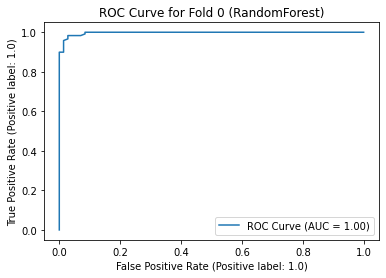

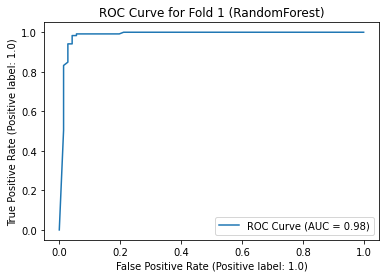

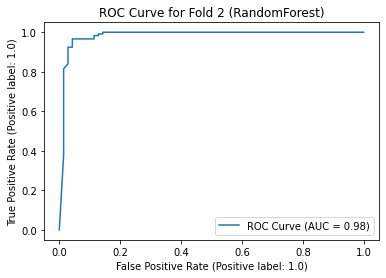

In [ ]:
# Creative graphs of ROC curves for each fold

# Ignore warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

for key in d_test_s_y.keys(): 
    rfc = RandomForestClassifier(criterion="entropy", max_features="sqrt", random_state=23)
    train_X = d_train_df_X[key]
    test_X = d_test_df_X[key]
    train_y = d_train_s_y[key]
    test_y = d_test_s_y[key]
    rfc.fit(train_X, train_y)
    predict_y = rfc.predict(test_X)
    if (key == 2):
        y_hat_rf = predict_y

    ACC = 0;
    TP = 0;
    FN = 0;
    FP = 0;
    TN = 0;
    for i in range(len(predict_y)):
        if predict_y[i] == 1:
            if test_y.iloc[i] == 1:
                TP += 1
                ACC += 1
            else:
                FP += 1
        else:
            if test_y.iloc[i] == 0:
                TN += 1
                ACC += 1
            else:
                FN += 1
    acc_rf[key] = ACC/(TP+FP+TN+FN)
    tpr_rf[key] = TP/(TP+FN)
    ppv_rf[key] = TP/(TP+FP)
    fpr_rf[key] = FP/(FP+TN)
    
    # Plot graph
    plot_roc_curve(rfc, test_X, test_y, name= "ROC Curve")
    plt.title("ROC Curve for Fold " + str(key) + " (RandomForest)")
    plt.show()

In [ ]:
print('The min, mean, and max True Positive Rates are: {:.2f}, {:.2f}, and {:.2f}'.format(tpr_rf.min(), tpr_rf.mean(), tpr_rf.max()))
print('The min, mean, and max Positive Prediction Value are: {:.2f}, {:.2f}, and {:.2f}'.format(ppv_rf.min(), ppv_rf.mean(), ppv_rf.max()))
print('The min, mean, and max Accuracy are: {:.2f}, {:.2f}, and {:.2f}'.format(acc_rf.min(), acc_rf.mean(), acc_rf.max()))

The min, mean, and max True Positive Rates are: 0.97, 0.98, and 0.99
The min, mean, and max Positive Prediction Value are: 0.92, 0.96, and 0.98
The min, mean, and max Accuracy are: 0.94, 0.96, and 0.97


**Adaboost**

In [ ]:
# Initializing K 
k = 3
acc_ab = np.zeros(k)
tpr_ab = np.zeros(k)
ppv_ab = np.zeros(k)
fpr_ab = np.zeros(k)

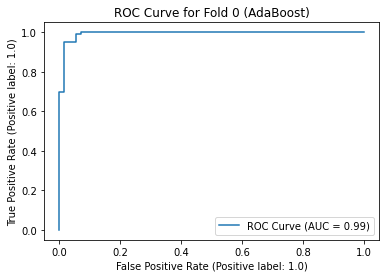

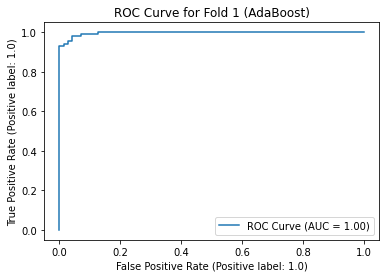

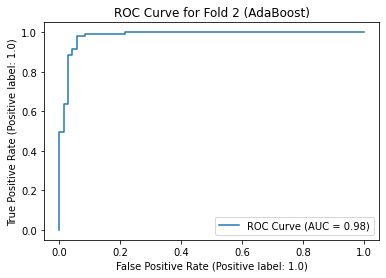

In [ ]:
# Creative graphs of ROC curves for each fold
# Ignore warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
for key in d_test_s_y.keys(): 
    # Create AdaBoost Classifier
    abc = AdaBoostClassifier(n_estimators=25, random_state=23)
    # Pull training and test data 
    train_X = d_train_df_X[key]
    test_X = d_test_df_X[key]
    train_y = d_train_s_y[key]
    test_y = d_test_s_y[key]
    # Fit model
    abc.fit(train_X, train_y)
    predict_y = abc.predict(test_X)
    if (key == 2):
        y_hat_ab = predict_y
    # Calculate True Positives and Negatives and False Positives and Negatives
    ACC = 0;
    TP = 0;
    FN = 0;
    FP = 0;
    TN = 0;
    for i in range(len(predict_y)):
        if predict_y[i] == 1:
            if test_y.iloc[i] == 1:
                TP += 1
                ACC += 1
            else:
                FP += 1
        else:
            if test_y.iloc[i] == 0:
                TN += 1
                ACC += 1
            else:
                FN += 1
    acc_ab[key] = ACC/(TP+FP+TN+FN)
    tpr_ab[key] = TP/(TP+FN)
    ppv_ab[key] = TP/(TP+FP)
    fpr_ab[key] = FP/(FP+TN)
    # Plot graph
    plot_roc_curve(abc, test_X, test_y, name="ROC Curve")
    plt.title("ROC Curve for Fold " + str(key) + " (AdaBoost)")
    plt.show()

In [ ]:
print('The min, mean, and max True Positive Rates are: {:.2f}, {:.2f}, and {:.2f}'.format(tpr_ab.min(), tpr_ab.mean(), tpr_ab.max()))
print('The min, mean, and max Positive Prediction Value are: {:.2f}, {:.2f}, and {:.2f}'.format(ppv_ab.min(), ppv_ab.mean(), ppv_ab.max()))
print('The min, mean, and max Accuracy are: {:.2f}, {:.2f}, and {:.2f}'.format(acc_ab.min(), acc_ab.mean(), acc_ab.max()))

The min, mean, and max True Positive Rates are: 0.97, 0.98, and 0.99
The min, mean, and max Positive Prediction Value are: 0.94, 0.96, and 0.97
The min, mean, and max Accuracy are: 0.95, 0.96, and 0.96


***Using different classifiers, I can infer the ADABOOST classifier is more accuracte as it gave us better max prediction values and accuracy values. We can conclude there is a highly correlated relationship between radius, symmetry, and texture, when testing if a patient will have breast cancer.*** 